In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('auto-mpg.data', sep="\s+", header=None, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8], names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name'])
#Data is read into the program, maxing out at 9 columns to prevent car names interfering. 

del df['origin']
df = df.drop(df[df['horsepower'] == '?'].index)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) 
df['horsepower'] = df['horsepower'].astype(float)
#Data is cleaned, indeces are corrected
#horsepower column must be fixed as it was imported as a column of strings because of missing data set to "?"
#origin column removed
df.style.format({"mpg": "{:20,.0f}",
                 "cylinders": "{:20,.0f}",
                 "displacement": "{:20,.0f}",
                 "horsepower": "{:20,.0f}",
                 "weight": "{:20,.1f}",
                 "acceleration": "{:20,.1f}",
                 "model year": "{:20,.0f}",
                 "origin": "{:20,.0f}",
                })
#Data after cleaning, missing values have been removed, data table has been styled

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18,8,307,130,"3,504.0",12.0,70,chevrolet chevelle malibu
1,15,8,350,165,"3,693.0",11.5,70,buick skylark 320
2,18,8,318,150,"3,436.0",11.0,70,plymouth satellite
3,16,8,304,150,"3,433.0",12.0,70,amc rebel sst
4,17,8,302,140,"3,449.0",10.5,70,ford torino
5,15,8,429,198,"4,341.0",10.0,70,ford galaxie 500
6,14,8,454,220,"4,354.0",9.0,70,chevrolet impala
7,14,8,440,215,"4,312.0",8.5,70,plymouth fury iii
8,14,8,455,225,"4,425.0",10.0,70,pontiac catalina
9,15,8,390,190,"3,850.0",8.5,70,amc ambassador dpl


In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
median = df.median(axis = 0) 
median

#MPG[0], Cylinders[1], Displacement[2], horsepower[3], Weight[4], Acceleration[5], Model Year[6]

mpg               22.75
cylinders          4.00
displacement     151.00
horsepower        93.50
weight          2803.50
acceleration      15.50
model year        76.00
dtype: float64

In [5]:
var = df.var(axis=0)
var

mpg                 60.918142
cylinders            2.909696
displacement     10950.367554
horsepower        1481.569393
weight          721484.709008
acceleration         7.611331
model year          13.569915
dtype: float64

In [6]:
df1 = df.loc[df['mpg']  > 22]
df1.reset_index(drop=True, inplace=True)
df2 = df.loc[df['mpg']  <= 22]
df2.reset_index(drop=True, inplace=True)
mean = df1.mean(axis = 0) #mean values of cars with more than 20 mpg stored
data = mean[1:]  #bar graph data for all means except weight (too large)
wdata = mean[4] #bar graph data for weights

mean = df2.mean(axis = 0) #mean values of cars with less than or equal to 20 mpg stored
data1 = mean[1:] #bar graph data for all means except weight (too large)
wdata1 = mean[4] #bar graph data for weights
width = 0.3


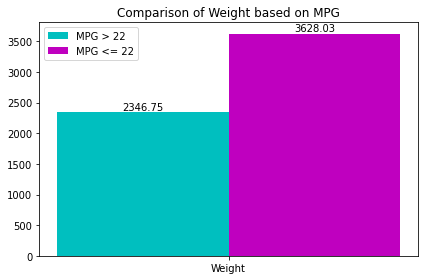

In [7]:
cat = ['Weight']
x = np.arange(len(cat))
fig, ax = plt.subplots()
bar = ax.bar(x - width/2, wdata, width, label='MPG > 22', color='c')
bar1 = ax.bar(x + width/2, wdata1, width, label='MPG <= 22', color='m')
ax.set_title('Comparison of Weight based on MPG')
ax.set_xticks(x)
ax.set_xticklabels(cat)
ax.legend()
ax.bar_label(bar, padding=0)
ax.bar_label(bar1, padding=0)
fig.tight_layout()
plt.show()

In [8]:
data = data.drop(data.index[3])
data1 = data1.drop(data1.index[3])
cat = ['Cylinders', 'Displace', 'H.Power', 'Acceler.', 'Year']
x = np.arange(len(cat))

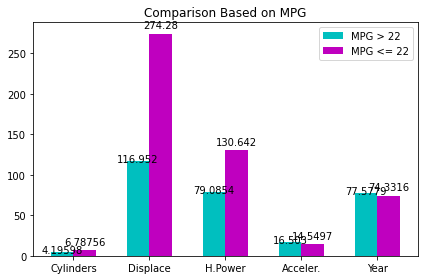

In [9]:
fig, ax = plt.subplots()
bar = ax.bar(x - width/2, data, width, label='MPG > 22', color='c')
bar1 = ax.bar(x + width/2, data1, width, label='MPG <= 22', color='m')
ax.set_title('Comparison Based on MPG')
ax.set_xticks(x)
ax.set_xticklabels(cat)
ax.legend()
ax.bar_label(bar, padding=-3)
ax.bar_label(bar1, padding=3)
fig.tight_layout()
plt.show()

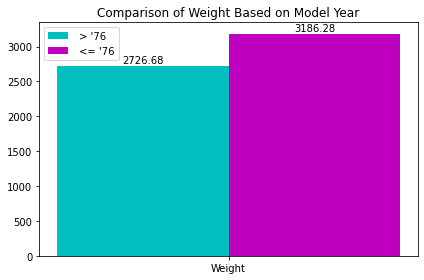

In [18]:
df1 = df.loc[df['model year']  > 76]
df1.reset_index(drop=True, inplace=True)
df2 = df.loc[df['model year']  <= 76]
df2.reset_index(drop=True, inplace=True)
data = df1.mean(axis = 0)
data1 = df2.mean(axis = 0)
wdata = data[4]
wdata1 = data1[4]
data = data.drop(data.index[4])
data1 = data1.drop(data1.index[4])
data = data.drop(data.index[5])
data1 = data1.drop(data1.index[5])
cat = ['Weight']
x = np.arange(len(cat))
fig, ax = plt.subplots()
bar = ax.bar(x - width/2, wdata, width, label=' > \'76', color='c')
bar1 = ax.bar(x + width/2, wdata1, width, label=' <= \'76', color='m')
ax.set_title('Comparison of Weight Based on Model Year')
ax.set_xticks(x)
ax.set_xticklabels(cat)
ax.legend()
ax.bar_label(bar, padding=0)
ax.bar_label(bar1, padding=0)
fig.tight_layout()
plt.show()

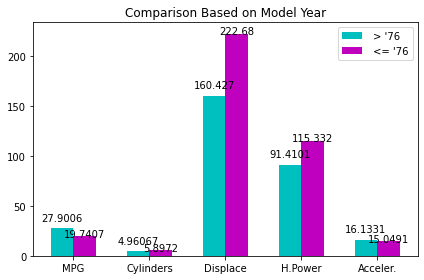

In [19]:
cat = ['MPG', 'Cylinders', 'Displace', 'H.Power', 'Acceler.']
x = np.arange(len(cat))
fig, ax = plt.subplots()
bar = ax.bar(x - width/2, data, width, label=' > \'76', color='c')
bar1 = ax.bar(x + width/2, data1, width, label=' <= \'76', color='m')
ax.set_title('Comparison Based on Model Year')
ax.set_xticks(x)
ax.set_xticklabels(cat)
ax.legend()
ax.bar_label(bar, padding=5)
ax.bar_label(bar1, padding=-3)
fig.tight_layout()
plt.show()

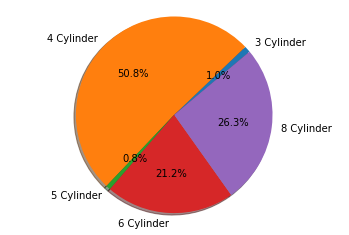

199


In [12]:
df1 = df.loc[df['cylinders'] == 3]
df2 = df.loc[df['cylinders'] == 4]
df3 = df.loc[df['cylinders'] == 5]
df4 = df.loc[df['cylinders'] == 6]
df5 = df.loc[df['cylinders'] == 8]
r = df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0] + df5.shape[0]
p1 = df1.shape[0]/r
p2 = df2.shape[0]/r
p3 = df3.shape[0]/r
p4 = df4.shape[0]/r
p5 = df5.shape[0]/r
data = [p1, p2, p3, p4, p5]
cat = ['3 Cylinder','4 Cylinder','5 Cylinder','6 Cylinder','8 Cylinder']
fig, ax = plt.subplots()
ax.pie(data, explode=None, labels=cat, autopct='%1.1f%%', shadow=True, startangle=40)
ax.axis('equal')
plt.show()
print(df2.shape[0])

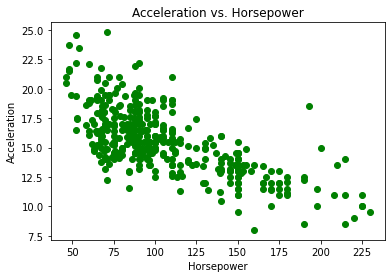

In [12]:
plt.scatter(df['horsepower'], df['acceleration'], c='green')
plt.title('Acceleration vs. Horsepower')
plt.xlabel("Horsepower")
plt.ylabel("Acceleration")
plt.show()